In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.io import write_html
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [4]:
colorscale = [
    [0, 'rgb(244, 164, 96)'],
    [0.5, 'white'],
    [1, '#4682B4']
]
colorscale2 = [
    [0, 'rgba(255, 165, 0,0.8)'],
    [0.5, 'white'],
    [1, 'rgba(50,50,100,0.8)']
] 
colorscale3 = [
    [0, 'rgba(50,50,100,0.8)'],
    [0.5, 'white'],
    [1, 'rgba(255, 165, 0,0.8)']
] 

In [85]:
master = pd.read_csv('[2004, 2024]base_master_versionDec2025.csv')
master

,Year,State,Region,Average WBA,Maximum WBA,Minimum WBA,Average Weekly Wage,Indexer,Non-indexer,Recipiency Rate,...,National CPI-U,Regional CPI-U,"Real Average WBA (base 2004, region)","Real Maximum WBA (base 2004, region)","Real Average WBA (base 2004, nation)","Real Maximum WBA (base 2004, nation)","Real Average WBA (base 2024, region)","Real Maximum WBA (base 2024, region)","Real Average WBA (base 2024, nation)","Real Maximum WBA (base 2024, nation)"
0,2000,AK,West,168.56,248.0,44.0,599.99,False,True,0.608800,...,172.200,174.800,186.11,273.82,184.91,272.05,321.06,472.37,307.06,451.77
1,2000,AL,South,164.13,190.0,45.0,428.77,False,True,0.292086,...,172.200,167.200,178.46,206.59,180.05,208.43,299.58,346.80,298.99,346.11
2,2000,AR,South,211.50,309.0,55.0,433.26,True,False,0.453458,...,172.200,167.200,229.97,335.98,232.01,338.97,386.05,564.01,385.28,562.89
3,2000,AZ,West,176.33,205.0,40.0,458.32,False,True,0.205709,...,172.200,174.800,194.69,226.34,193.43,224.88,335.86,390.47,321.21,373.44
4,2000,CA,West,163.65,230.0,40.0,528.25,False,True,0.409791,...,172.200,174.800,180.69,253.95,179.52,252.31,311.71,438.09,298.11,418.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2024,VT,Northeast,531.28,705.0,86.0,1080.07,True,False,0.314618,...,313.689,324.397,327.88,435.09,319.93,424.54,531.28,705.00,531.28,705.00
1294,2024,WA,West,721.72,1019.0,323.0,1581.08,True,False,0.323126,...,313.689,332.945,418.36,590.69,434.61,613.63,721.72,1019.00,721.72,1019.00
1295,2024,WI,Midwest,346.58,370.0,54.0,1075.81,False,True,0.297271,...,313.689,290.370,217.95,232.68,208.71,222.81,346.58,370.00,346.58,370.00
1296,2024,WV,South,441.00,662.0,24.0,1029.24,True,False,0.243330,...,313.689,305.187,262.70,394.35,265.57,398.65,441.00,662.00,441.00,662.00


## Figure 1a/1b: Number of Years from 2004-2024 with Increase in Nominal Min/Max WBA

In [ ]:
master = master[(master['Year'] >= 2000)]
master

In [186]:
def years_since_last_increase(df, latest_year=2024):
    # Sort properly
    df = df.sort_values(['State', 'Year'])

    results = []

    for state, g in df.groupby('State'):
        g = g.sort_values('Year').reset_index(drop=True)

        # Compute year-over-year changes
        g['delta'] = g['Maximum WBA'].diff()

        # Find most recent increase
        increases = g[g['delta'] > 0]

        if increases.empty:
            # No increase ever observed
            years_since = 22
        else:
            last_increase_year = increases['Year'].max()
            years_since = latest_year - last_increase_year

        results.append({
            'State': state,
            'Years Since Last Increase': years_since
        })

    return pd.DataFrame(results)

In [187]:
years_since = years_since_last_increase(master)

In [173]:
bins = [-0.1, 0, 5, 10, 15, 22]
labels = ['0', '1-5', '6-10', '11-15', '15+']
years_since['Years Since Last Increase'] = pd.cut(years_since['Years Since Last Increase'], bins=bins, labels=labels, include_lowest=True)

In [174]:
color_map = {
    '15+': '#ed3b13',       # red
    '11-15': '#f68b1f',
    '6-10': '#879bb1',
    '1-5': '#6cc3d8',
    '0': '#2D3172'    # blue
}

In [175]:
# Define custom order of labels
category_order = ["0", "1-5", "6-10", "11-15", "15+"]

# Convert the column to a categorical type with the specified order
years_since["Years Since Last Increase"] = pd.Categorical(years_since["Years Since Last Increase"], categories=category_order, ordered=True)

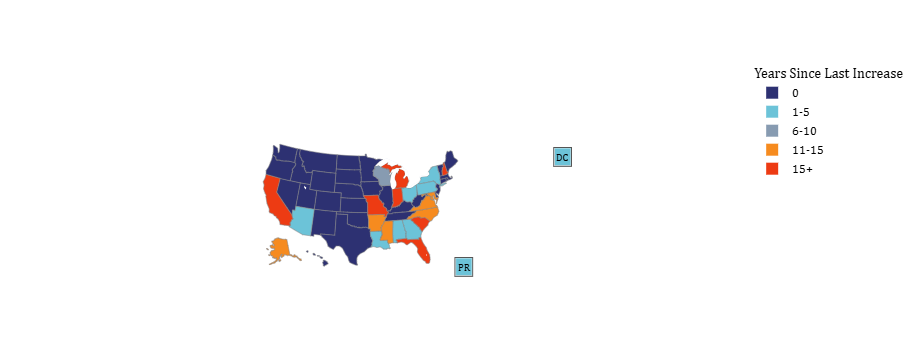

In [167]:
fig = px.choropleth(
    data_frame=years_since,
    locations='State',               
    locationmode='USA-states',       
    color='Years Since Last Increase',
    color_discrete_map=color_map,
    scope='usa',
    labels={'Year Bucket': 'Year Bucket'},
    category_orders={"Years Since Last Increase": category_order}
)
fig.update_traces(
    marker_line_color='gray',
    marker_line_width=0.5
)

pr_row = years_since[years_since['State'] == 'PR'].iloc[0]
pr_years = pr_row['Years Since Last Increase']
pr_color = color_map[pr_years]

# Outer box
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.57, y0=0.02,
    x1=0.595, y1=0.10,
    line=dict(color="black", width=2),
    fillcolor="white",
    layer="above"
)

# Inner colored rectangle (Puerto Rico)
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.57, y0=0.02,
    x1=0.595, y1=0.10,
    line=dict(color="white", width=0.5),
    fillcolor=pr_color,
    layer="above"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.583, y=0.022,
    text="PR",
    showarrow=False,
    font=dict(size=10, family="Cambria"),
    align="center"
)

dc_row = years_since[years_since['State'] == 'DC'].iloc[0]
dc_years = dc_row['Years Since Last Increase']
dc_color = color_map[dc_years]

# Outer box
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.72, y0=0.52,
    x1=0.745, y1=0.60,
    line=dict(color="black", width=2),
    fillcolor="white",
    layer="above"
)

# Inner colored rectangle (DC)
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.72, y0=0.52,
    x1=0.745, y1=0.60,
    line=dict(color="white", width=0.5),
    fillcolor=dc_color,
    layer="above"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.7447, y=0.561,
    text="DC",
    showarrow=False,
    font=dict(size=10, family="Cambria"),
    align="center"
)


fig.update_layout(
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    )
)

# ,
#         legend=dict(
#         x=0.75,     # move left/right (closer = smaller)
#         y=0.5,      # vertical position
#         xanchor='left',
#         yanchor='middle',
#         bgcolor='rgba(255,255,255,0.8)',
#         bordercolor='white',
#         borderwidth=1
#     )

fig.show()

In [188]:
years_since

,State,Years Since Last Increase
0,AK,15
1,AL,4
2,AR,12
3,AZ,1
4,CA,19
5,CO,0
6,CT,0
7,DC,4
8,DE,0
9,FL,22


In [98]:
nominal_inc_maxwba = master.groupby("State")[['Maximum WBA']].apply("nunique")
nominal_inc_maxwba = nominal_inc_maxwba.reset_index()
nominal_inc_maxwba['Maximum WBA'] = nominal_inc_maxwba['Maximum WBA'] - 1
nominal_inc_maxwba = nominal_inc_maxwba.rename(columns={'Maximum WBA': "Number of Increases"})
nominal_inc_maxwba

,State,Number of Increases
0,AK,1
1,AL,6
2,AR,7
3,AZ,2
4,CA,1
5,CO,20
6,CT,20
7,DC,5
8,DE,2
9,FL,0


In [99]:
bins = [-0.1, 0, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
nominal_inc_maxwba['Number of Increases'] = pd.cut(nominal_inc_maxwba['Number of Increases'], bins=bins, labels=labels, include_lowest=True)

In [100]:
color_map = {
    '0': '#ed3b13',       # red
    '1-5': '#f68b1f',
    '6-10': '#879bb1',
    '11-15': '#6cc3d8',
    '15-20': '#2D3172'    # blue
}

In [101]:
# Define custom order of labels
category_order = ["0", "1-5", "6-10", "11-15", "15-20"]

# Convert the column to a categorical type with the specified order
nominal_inc_maxwba["Number of Increases"] = pd.Categorical(nominal_inc_maxwba["Number of Increases"], categories=category_order, ordered=True)

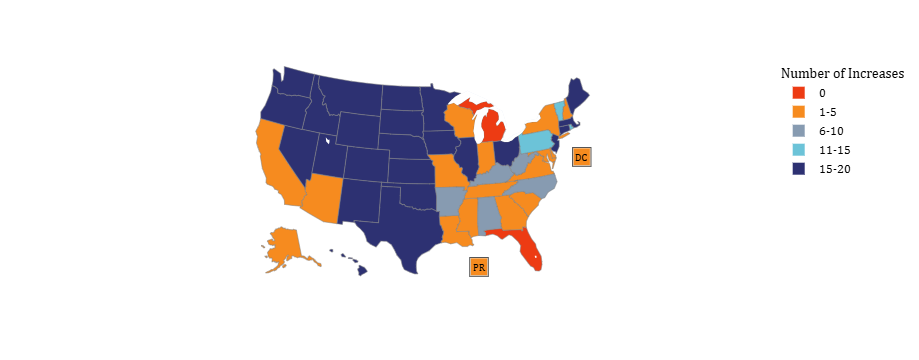

In [140]:
fig = px.choropleth(
    data_frame=nominal_inc_maxwba,
    locations='State',               
    locationmode='USA-states',       
    color='Number of Increases',
    color_discrete_map=color_map,
    scope='usa',
    labels={'Year Bucket': 'Year Bucket'},
    category_orders={"Number of Increases": category_order}
)
fig.update_traces(
    marker_line_color='gray',
    marker_line_width=0.5
)

pr_row = nominal_inc_maxwba[nominal_inc_maxwba['State'] == 'PR'].iloc[0]
pr_years = pr_row['Number of Increases']
pr_color = color_map[pr_years]

# Outer box
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.57, y0=0.02,
    x1=0.595, y1=0.10,
    line=dict(color="black", width=2),
    fillcolor="white",
    layer="above"
)

# Inner colored rectangle (Puerto Rico)
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.57, y0=0.02,
    x1=0.595, y1=0.10,
    line=dict(color="white", width=0.5),
    fillcolor=pr_color,
    layer="above"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.583, y=0.022,
    text="PR",
    showarrow=False,
    font=dict(size=10, family="Cambria"),
    align="center"
)

dc_row = nominal_inc_maxwba[nominal_inc_maxwba['State'] == 'DC'].iloc[0]
dc_years = dc_row['Number of Increases']
dc_color = color_map[dc_years]

# Outer box
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.72, y0=0.52,
    x1=0.745, y1=0.60,
    line=dict(color="black", width=2),
    fillcolor="white",
    layer="above"
)

# Inner colored rectangle (Puerto Rico)
fig.add_shape(
    type="rect",
    xref="paper", yref="paper",
    x0=0.72, y0=0.52,
    x1=0.745, y1=0.60,
    line=dict(color="white", width=0.5),
    fillcolor=dc_color,
    layer="above"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.7447, y=0.561,
    text="DC",
    showarrow=False,
    font=dict(size=10, family="Cambria"),
    align="center"
)


fig.update_layout(
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    )
)

# ,
#         legend=dict(
#         x=0.75,     # move left/right (closer = smaller)
#         y=0.5,      # vertical position
#         xanchor='left',
#         yanchor='middle',
#         bgcolor='rgba(255,255,255,0.8)',
#         bordercolor='white',
#         borderwidth=1
#     )

fig.show()

In [44]:
write_html(fig, 'fig_1a.html')

In [71]:
nominal_inc_maxwba

,State,Number of Years
0,AK,1-5
1,AL,6-10
2,AZ,1-5
3,CA,1-5
4,DE,1-5
5,FL,0
6,GA,1-5
7,IN,1-5
8,MD,1-5
9,MI,0


In [56]:
nominal_inc_maxwba[(nominal_inc_maxwba['Number of Years'] == "1-5") | (nominal_inc_maxwba['Number of Years'] == '0')]
nominal_inc_maxwba = nominal_inc_maxwba.merge(master[["State", "Non-indexer"]], on="State", how="left")

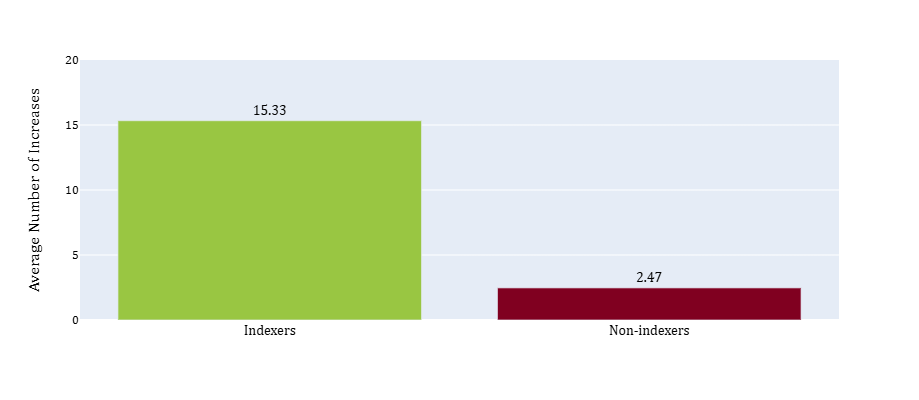

In [146]:
df = pd.DataFrame({
    'Category': ['Indexers', 'Non-indexers'],
    'Value': [15.33, 2.47]
})
color_map = {'Indexers': '#99c642', 'Non-indexers': '#800020'}

# Create bar chart
fig = px.bar(
    df,
    x='Category',
    y='Value',
    color='Category',
    color_discrete_map=color_map,
    text='Value'
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_yaxes(range=[0, 20], title='Average Number of Increases')
fig.update_layout(
    font=dict(
        family='Cambria',
        size=14,
        color='black'
    ),
    showlegend=False,
    xaxis_title = "",
    width=400,   
    height=400,
    yaxis_title_font=dict(size=16),
    yaxis_tickfont=dict(size=12)
)

fig.show()


In [45]:
nominal_inc_minwba = master_trim.groupby("State")[['Minimum WBA']].apply("nunique")
nominal_inc_minwba = nominal_inc_minwba.reset_index()
nominal_inc_minwba['Minimum WBA'] = nominal_inc_minwba['Minimum WBA'] - 1
nominal_inc_minwba = nominal_inc_minwba.rename(columns={'Minimum WBA': "Number of Years"})
#nominal_inc_minwba

bins = [-0.1, 0, 5, 10, 15, 20]
labels = ['0', '1-5', '6-10', '11-15', '15-20']
nominal_inc_minwba['Number of Years'] = pd.cut(nominal_inc_minwba['Number of Years'], bins=bins, labels=labels, include_lowest=True)

# Define custom order of labels
category_order = ["0", "1-5", "6-10", "11-15", "15-20"]

# Convert the column to a categorical type with the specified order
nominal_inc_minwba["Number of Years"] = pd.Categorical(nominal_inc_minwba["Number of Years"], categories=category_order, ordered=True)

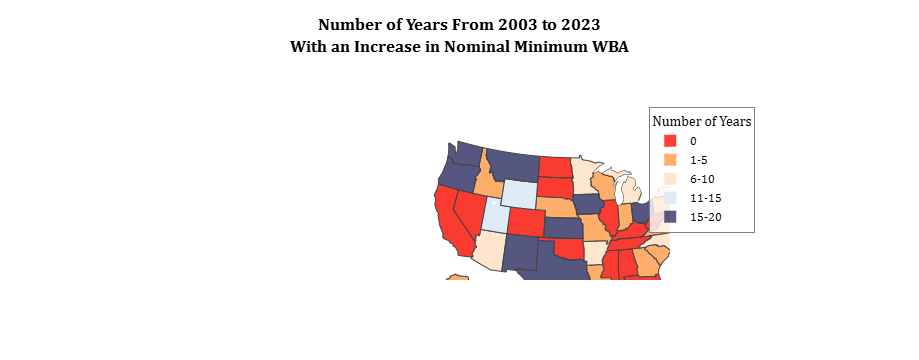

In [46]:
fig = px.choropleth(
    data_frame=nominal_inc_minwba,
    locations='State',               
    locationmode='USA-states',       
    color='Number of Years',
    color_discrete_map=color_map,
    scope='usa',
    labels={'Year Bucket': 'Year Bucket'},
    category_orders={"Number of Years": category_order}
)                    

fig.update_layout(
    title={
        'text': "<b>Number of Years From 2003 to 2023<br>With an Increase in Nominal Minimum WBA</b>",
        'x': 0.5, 
        'xanchor': 'center'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    legend=dict(
        x=0.75,     # move left/right (closer = smaller)
        y=0.5,      # vertical position
        xanchor='left',
        yanchor='middle',
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='gray',
        borderwidth=1
    )
)

fig.show()

In [47]:
write_html(fig, "fig_1b.html")

## Figure 2: Trends in Average and Max Real WBA over 2000-2023 in California, state/region-adjusted

In [8]:
master_trim[(master_trim['State'] == "CA")]

,Year,State,Region,Average WBA,Maximum WBA,Minimum WBA,Average Weekly Wage,Indexer,Non-indexer,Recipiency Rate,...,National CPI-U,Regional CPI-U,"Real Average WBA (base 2004, region)","Real Maximum WBA (base 2004, region)","Real Average WBA (base 2004, nation)","Real Maximum WBA (base 2004, nation)","Real Average WBA (base 2024, region)","Real Maximum WBA (base 2024, region)","Real Average WBA (base 2024, nation)","Real Maximum WBA (base 2024, nation)"
211,2004,CA,West,266.72,410.0,40.0,639.46,False,True,0.395734,...,188.900,193.000,266.72,410.00,266.72,410.00,460.12,707.29,442.92,680.85
263,2005,CA,West,288.56,450.0,40.0,728.51,False,True,0.384043,...,195.300,198.900,280.00,436.65,279.10,435.25,483.03,753.27,463.48,722.79
315,2006,CA,West,296.48,450.0,40.0,716.23,False,True,0.394716,...,201.600,205.700,278.18,422.22,277.80,421.65,479.88,728.37,461.32,700.20
367,2007,CA,West,308.70,450.0,40.0,748.47,False,True,0.391623,...,207.342,212.230,280.73,409.23,281.24,409.97,484.29,705.96,467.03,680.81
419,2008,CA,West,315.07,450.0,40.0,751.39,False,True,0.379992,...,215.303,219.646,276.85,395.41,276.43,394.82,477.59,682.12,459.05,655.63
471,2009,CA,West,326.24,450.0,40.0,841.22,False,True,0.368100,...,214.537,218.822,287.74,396.90,287.25,396.23,496.39,684.69,477.02,657.98
523,2010,CA,West,314.46,450.0,40.0,827.45,False,True,0.285788,...,218.056,221.203,274.37,392.63,272.41,389.83,473.31,677.32,452.37,647.36
575,2011,CA,West,307.98,450.0,40.0,785.54,False,True,0.249541,...,224.939,227.485,261.29,381.78,258.64,377.90,450.76,658.62,429.49,627.55
627,2012,CA,West,305.81,450.0,40.0,820.48,False,True,0.258237,...,229.594,232.376,253.99,373.75,251.61,370.24,438.16,644.75,417.82,614.82
679,2013,CA,West,313.13,450.0,40.0,804.33,False,True,0.275953,...,232.957,235.824,256.27,368.28,253.91,364.90,442.09,635.33,421.65,605.95


In [368]:
ca_state = master_trim[(master_trim['State'] == "CA") & (master_trim['Year'] <= 2017)]

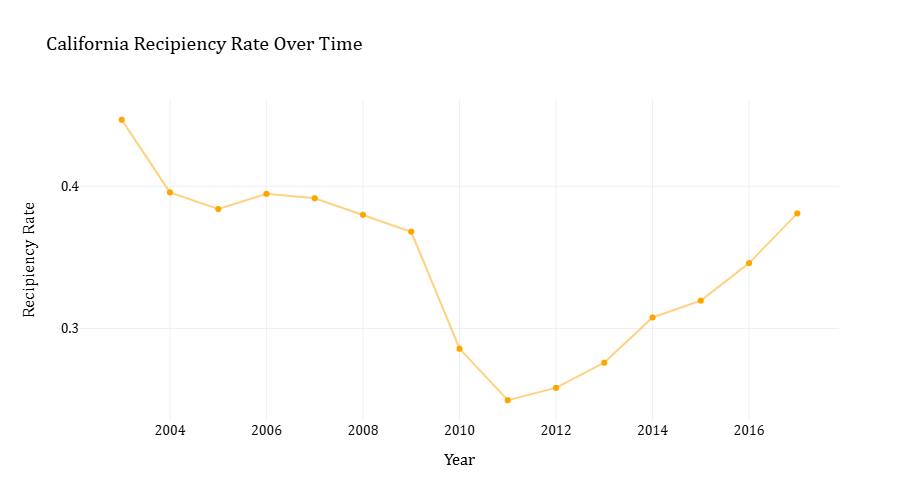

In [369]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = ca_state['Year'], 
             y = ca_state['Recipiency Rate']
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = ca_state['Year'], 
                y = ca_state['Recipiency Rate'],
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="California Recipiency Rate Over Time",
                   xaxis_title="Year", yaxis_title="Recipiency Rate",
                   height =500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.show()

In [ ]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = range(2003, 2024), 
             y = corr_coefs
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = range(2003, 2024), 
                y = corr_coefs,
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="California Recipiency Rate Over Time",
                   xaxis_title="Year", yaxis_title="Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.show()

In [9]:
ca_realwba_trend = master_trim[master_trim['State'] == "CA"][['Year', 'Average WBA', 'Maximum WBA',
                                                    'Real Average WBA (base 2004, region)', 'Real Maximum WBA (base 2004, region)']]
ca_realwba_trend

,Year,Average WBA,Maximum WBA,"Real Average WBA (base 2004, region)","Real Maximum WBA (base 2004, region)"
211,2004,266.72,410.0,266.72,410.00
263,2005,288.56,450.0,280.00,436.65
315,2006,296.48,450.0,278.18,422.22
367,2007,308.70,450.0,280.73,409.23
419,2008,315.07,450.0,276.85,395.41
471,2009,326.24,450.0,287.74,396.90
523,2010,314.46,450.0,274.37,392.63
575,2011,307.98,450.0,261.29,381.78
627,2012,305.81,450.0,253.99,373.75
679,2013,313.13,450.0,256.27,368.28


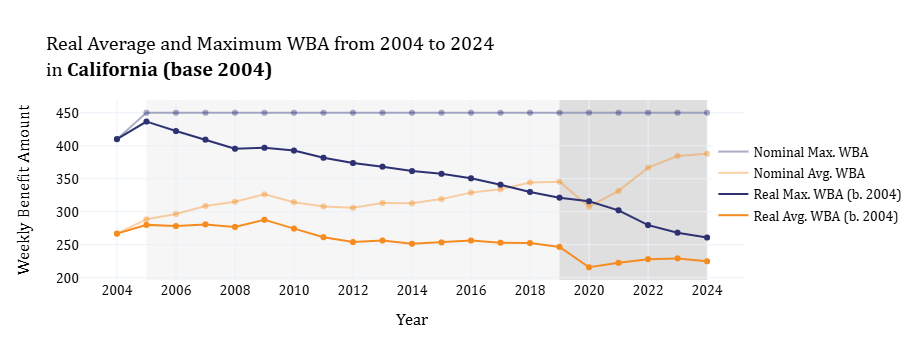

In [13]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Real Average WBA (base 2004, region)",
              )
fig1.update_traces(line=dict(color = 'rgba(246, 139, 31,1)'), name="Real Avg. WBA (b. 2004)", showlegend=True)

fig2 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Real Average WBA (base 2004, region)",
                color_discrete_sequence=["rgb(246, 139, 31)"])

fig3 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Real Maximum WBA (base 2004, region)")
fig3.update_traces(line=dict(color = "rgba(45, 49, 114, 1)"), name="Real Max. WBA (b. 2004)", showlegend=True)

fig4= px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Real Maximum WBA (base 2004, region)",
                color_discrete_sequence=["rgba(45, 49, 114, 1)"])

fig5 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Average WBA",
            )
fig5.update_traces(line=dict(color = 'rgba(246, 139, 31, 0.4)'), name="Nominal Avg. WBA", showlegend=True)

fig6 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Average WBA",
                color_discrete_sequence=['rgba(246, 139, 31,0.4)'])

fig7 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Maximum WBA",
            )
fig7.update_traces(line=dict(color = 'rgba(45, 49, 114, 0.4)'), name="Nominal Max. WBA", showlegend=True)

fig8 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Maximum WBA",
                color_discrete_sequence=["rgba(45, 49, 114, 0.4)"])

fig1 = go.Figure(data=fig7.data + fig8.data + fig5.data + fig6.data + fig3.data + fig4.data + fig1.data + fig2.data)
fig1.update_layout(title_text="Real Average and Maximum WBA from 2004 to 2024 <br>in <b>California (base 2004)</b>",
                   xaxis_title="Year", yaxis_title="Weekly Benefit Amount",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=200,          
                        dtick=50 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.add_shape(
    type="rect",
    x0=2005, x1=2024,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="lightgray",
    opacity=0.2,
    layer="below",    
    line_width=0
)
fig1.add_shape(
    type="rect",
    x0=2019, x1=2024,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="gray",
    opacity=0.2,
    layer="below",    
    line_width=0
)

In [200]:
write_html(fig1, "fig_2a.html")

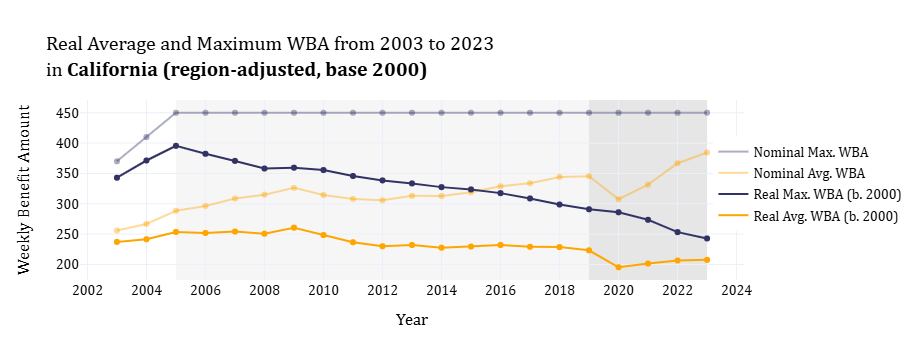

In [267]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Real Average WBA (regional, 2000 base)",
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Real Avg. WBA (b. 2000)", showlegend=True)

fig2 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Real Average WBA (regional, 2000 base)",
                color_discrete_sequence=["orange"])

fig3 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Real Maximum WBA (regional, 2000 base)")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="Real Max. WBA (b. 2000)", showlegend=True)

fig4= px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Real Maximum WBA (regional, 2000 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig5 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Average WBA",
            )
fig5.update_traces(line=dict(color = 'rgba(255, 165, 0,0.4)'), name="Nominal Avg. WBA", showlegend=True)

fig6 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Average WBA",
                color_discrete_sequence=['rgba(255, 165, 0,0.4)'])

fig7 = px.line(data_frame = ca_realwba_trend, 
             x = "Year", 
             y = "Maximum WBA",
            )
fig7.update_traces(line=dict(color = 'rgba(50,50,100,0.4)'), name="Nominal Max. WBA", showlegend=True)

fig8 = px.scatter(data_frame = ca_realwba_trend, 
                x = "Year", 
                y = "Maximum WBA",
                color_discrete_sequence=['rgba(50,50,100,0.4)'])

fig1 = go.Figure(data=fig7.data + fig8.data + fig5.data + fig6.data + fig3.data + fig4.data + fig1.data + fig2.data )
fig1.update_layout(title_text="Real Average and Maximum WBA from 2003 to 2023 <br>in <b>California (region-adjusted, base 2000)</b>",
                   xaxis_title="Year", yaxis_title="Weekly Benefit Amount",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=200,          
                        dtick=50 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.add_shape(
    type="rect",
    x0=2019, x1=2023,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="gray",
    opacity=0.2,
    layer="below",    
    line_width=0
)
fig1.add_shape(
    type="rect",
    x0=2005, x1=2019,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="lightgray",
    opacity=0.2,
    layer="below",    
    line_width=0
)

fig1.show()

In [204]:
write_html(fig1, "fig_2b.html")

## Figure 3: Changes in Real WBA from 2005-2023 across states, regions

In [69]:
master.columns

Index(['Unnamed: 0', 'Year', 'State', 'Replacement Ratio 1',
       'Replacement Ratio 2', 'Recipiency Rate', 'Average WBA', 'Minimum WBA',
       'Maximum WBA', 'Average Weekly Wage', 'Region', 'Annual Regional CPI-U',
       'Annualized State Inflation Rate', 'MET',
       'Real Average WBA (regional, 2000 base)',
       'Real Minimum WBA (regional, 2000 base)',
       'Real Maximum WBA (regional, 2000 base)',
       'Real Average WBA (state, 2000 base)',
       'Real Minimum WBA (state, 2000 base)',
       'Real Maximum WBA (state, 2000 base)',
       'Real Average WBA (regional, 2023 base)',
       'Real Minimum WBA (regional, 2023 base)',
       'Real Maximum WBA (regional, 2023 base)',
       'Real Average WBA (state, 2017 base)',
       'Real Minimum WBA (state, 2017 base)',
       'Real Maximum WBA (state, 2017 base)'],
      dtype='object')

In [252]:
rec_repl = master[['Year', 'State', 'Recipiency Rate', 
                   'Real Average WBA (regional, 2000 base)',
                   'Real Minimum WBA (regional, 2000 base)',
                   'Real Maximum WBA (regional, 2000 base)']]
rec_repl = rec_repl[(rec_repl['Year'] == 2003) | (rec_repl['Year'] == 2023)]
#rec_repl

In [253]:
starts = rec_repl[rec_repl['Year'] == 2003]
ends = rec_repl[rec_repl['Year'] == 2023]
ends = ends.rename(columns={"Real Average WBA (regional, 2000 base)": '1',
                            "Real Minimum WBA (regional, 2000 base)": '2',
                            "Real Maximum WBA (regional, 2000 base)": '3'})
starts = starts.merge(ends, on='State', how='left')
#starts

In [254]:
starts['% Change in Real Average WBA'] = ((starts['1'] - starts['Real Average WBA (regional, 2000 base)'])/starts['Real Average WBA (regional, 2000 base)'])*100
starts['% Change in Real Maximum WBA'] = ((starts["3"] - starts['Real Maximum WBA (regional, 2000 base)'])/starts['Real Maximum WBA (regional, 2000 base)'])*100
starts['% Change in Real Minimum WBA'] = ((starts["2"] - starts['Real Minimum WBA (regional, 2000 base)'])/starts['Real Minimum WBA (regional, 2000 base)'])*100
#starts

In [256]:
percent_changes = starts[['State', '% Change in Real Average WBA', '% Change in Real Minimum WBA', '% Change in Real Maximum WBA']]
percent_changes['% Change in Real Average WBA'].mean(), percent_changes['% Change in Real Maximum WBA'].mean()

(-0.39711467908943665, -5.483130882219137)

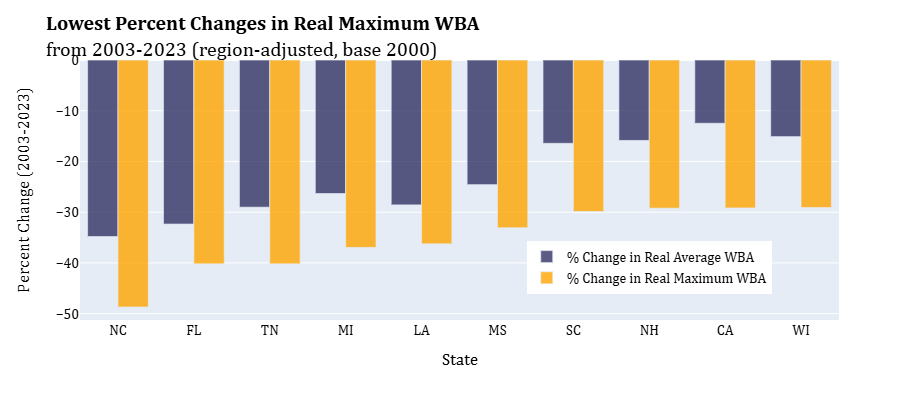

In [42]:
fig1 = px.bar(percent_changes.sort_values(by='% Change in Real Maximum WBA').iloc[range(10),:], 
             x='State', 
             y=['% Change in Real Average WBA', '% Change in Real Maximum WBA'], 
             color_discrete_sequence=['rgba(50,50,100,0.8)', 'rgba(255, 165, 0,0.8)'])
fig1.update_traces(showlegend=True)
fig1.update_layout(
    title_text="<b>Lowest Percent Changes in Real Maximum WBA</b> <br>from 2003-2023 (region-adjusted, base 2000)",
    width= 1000,
    height=400,
    barmode='group',
                   xaxis_title="State", yaxis_title="Percent Change (2003-2023)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   legend=dict(
                        title = "",
                        orientation="v",     
                        x=0.75,
                        xanchor="center",
                        y=0.1
                    )
                  )
fig1.update_traces(width=0.4) 
fig1.show()

In [43]:
write_html(fig1, "fig_3a.html")

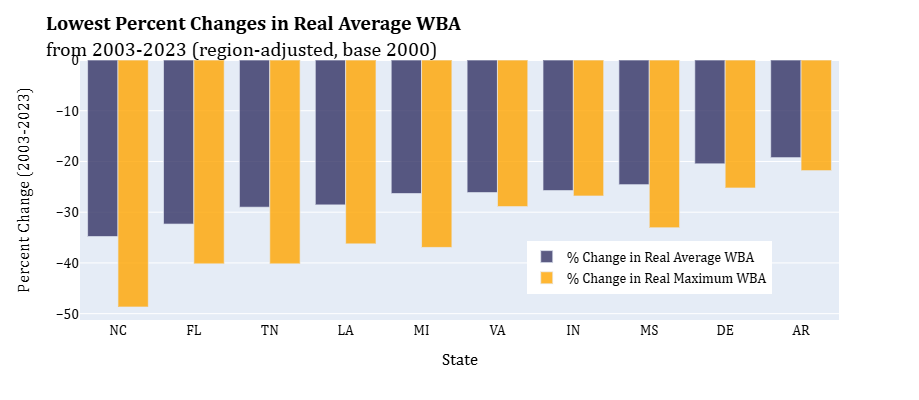

In [44]:
fig1 = px.bar(percent_changes.sort_values(by='% Change in Real Average WBA').iloc[range(10),:], 
             x='State', 
             y=['% Change in Real Average WBA', '% Change in Real Maximum WBA'], 
             color_discrete_sequence=['rgba(50,50,100,0.8)', 'rgba(255, 165, 0,0.8)'])
fig1.update_traces(showlegend=True)
fig1.update_layout(
    title_text="<b>Lowest Percent Changes in Real Average WBA</b> <br>from 2003-2023 (region-adjusted, base 2000)",
    width= 1000,
    height=400,
    barmode='group',
                   xaxis_title="State", yaxis_title="Percent Change (2003-2023)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   legend=dict(
                        title="",
                        orientation="v",     
                        x=0.75,
                        xanchor="center",
                        y=0.1
                    )
                  )
fig1.update_traces(width=0.4) 
fig1.show()

In [45]:
write_html(fig1, "fig_3b.html")

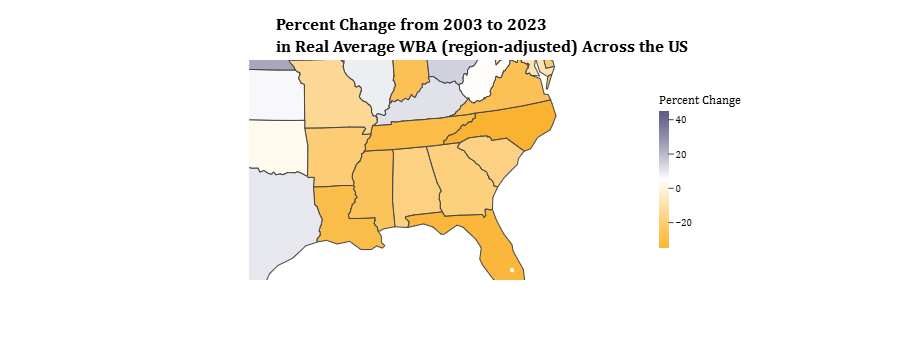

In [40]:
fig = px.choropleth(
    data_frame=percent_changes,
    locations='State',               
    locationmode='USA-states',       
    color='% Change in Real Average WBA',                   
    color_continuous_scale= colorscale2,
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Percent Change from 2003 to 2023 <br>in Real Average WBA (region-adjusted) Across the US </b>",
        'x': 0.3, 
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Percent Change',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

In [46]:
write_html(fig, "fig_3c.html")

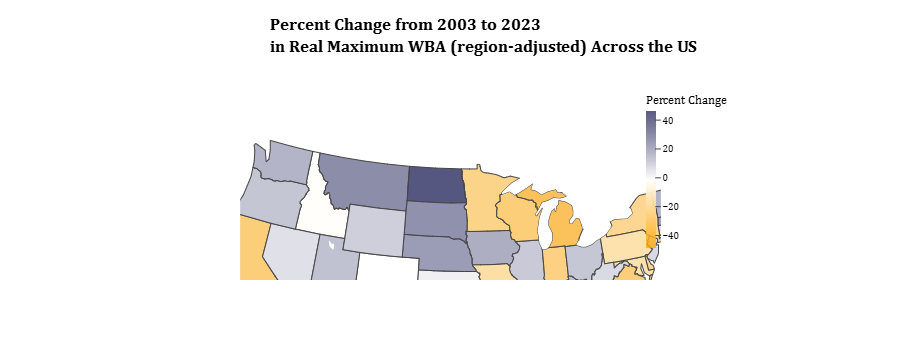

In [47]:
fig = px.choropleth(
    data_frame=percent_changes,
    locations='State',               
    locationmode='USA-states',       
    color='% Change in Real Maximum WBA',                   
    color_continuous_scale= colorscale2,
    scope='usa',                      
)

fig.update_layout(
    title={
        'text': "<b>Percent Change from 2003 to 2023 <br>in Real Maximum WBA (region-adjusted) Across the US </b>",
        'x': 0.3, 
        'xanchor': 'left'
    },
    font=dict(
        family="Cambria",  
        size=12,         
        color="black",
    ),
    coloraxis_colorbar=dict(
        title='Percent Change',
        x=0.75,            
        len=0.8,           
        thickness=10,      
        ticks='outside',
        tickfont=dict(size=10),
    )
)

fig.show()

In [48]:
write_html(fig, "fig_3d.html")

## Figure 5: Relationship between Replacement Rate and Recipiency Rate from 2004-2024

In [118]:
master_trim

,Unnamed: 0,Year,State,Replacement Ratio 1,Replacement Ratio 2,Recipiency Rate,Average WBA,Minimum WBA,Maximum WBA,Average Weekly Wage,...,"Real Maximum WBA (regional, 2000 base)","Real Average WBA (state, 2000 base)","Real Minimum WBA (state, 2000 base)","Real Maximum WBA (state, 2000 base)","Real Average WBA (regional, 2023 base)","Real Minimum WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)","Real Average WBA (state, 2017 base)","Real Minimum WBA (state, 2017 base)","Real Maximum WBA (state, 2017 base)"
155,155,2003,AK,0.308,0.274,0.558523,177.03,44.0,248.0,645.32,...,229.85,167.81,41.71,235.09,303.97,75.55,425.83,255.01,63.38,357.25
156,156,2003,AL,0.422,0.379,0.307436,180.19,45.0,210.0,474.86,...,198.04,166.35,41.54,193.87,301.25,75.23,351.09,242.48,60.56,282.60
157,157,2003,AR,0.512,0.498,0.471322,228.27,62.0,345.0,458.49,...,325.35,212.68,57.77,321.44,381.64,103.66,576.79,276.21,75.02,417.46
158,158,2003,AZ,0.406,0.328,0.302321,187.71,40.0,205.0,572.38,...,190.00,NaN,NaN,NaN,322.31,68.68,351.99,NaN,NaN,NaN
159,159,2003,CA,0.447,0.371,0.446838,255.88,40.0,370.0,690.17,...,342.93,232.07,36.28,335.58,439.36,68.68,635.31,350.14,54.73,506.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,1241,2023,VT,0.531,0.476,0.405788,496.00,80.0,668.0,1042.34,...,381.91,NaN,NaN,NaN,496.00,80.00,668.00,NaN,NaN,NaN
1242,1242,2023,WA,0.494,0.436,0.311163,710.91,317.0,999.0,1631.39,...,539.24,NaN,NaN,NaN,710.91,317.00,999.00,NaN,NaN,NaN
1243,1243,2023,WI,0.374,0.325,0.287291,342.65,54.0,370.0,1053.13,...,220.23,NaN,NaN,NaN,342.65,54.00,370.00,NaN,NaN,NaN
1244,1244,2023,WV,0.442,0.419,0.238561,401.43,24.0,630.0,957.72,...,355.36,NaN,NaN,NaN,401.43,24.00,630.00,NaN,NaN,NaN


In [120]:
# Prepare variables
X = master[master['Year']==2023][['Replacement Ratio 1']]
y = master[master['Year']==2023]['Recipiency Rate']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope = model.coef_[0]
r_squared = model.score(X, y)

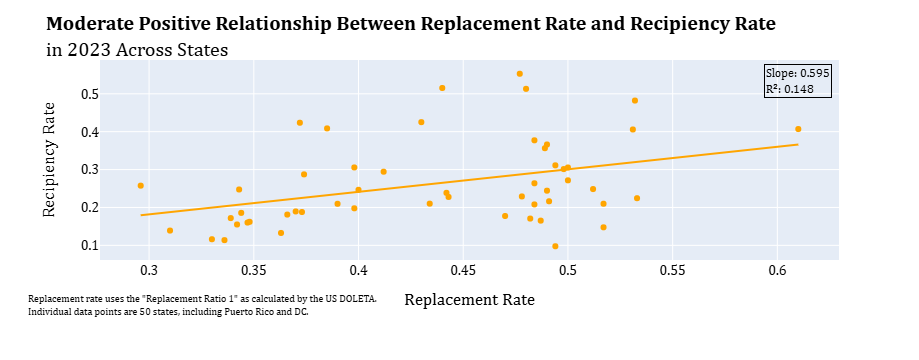

In [122]:
fig = px.scatter(data_frame = master[master['Year']==2023],
                 x = 'Replacement Ratio 1',
                 y = 'Recipiency Rate',
                 hover_data = ['State'],
                 trendline='ols',
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig.update_layout(title_text="<b>Moderate Positive Relationship Between Replacement Rate and Recipiency Rate</b> <br>in 2023 Across States",
                   xaxis_title="Replacement Rate", yaxis_title="Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout()
fig.add_annotation(
    text='Replacement rate uses the "Replacement Ratio 1" as calculated by the US DOLETA. <br>Individual data points are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope:.3f}<br>R²: {r_squared:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":100})
fig.show()

In [123]:
write_html(fig, "fig_5a.html")

In [72]:
from scipy.stats import pearsonr

def get_corr_coef_for_year(df, year, x, y, plotly=False):
    df = df[df['Year'] == year]
    r, _ = pearsonr(df[x], df[y])
    if plotly:
        fig = px.scatter(data_frame = df,
                 x = x,
                 y = y,
                 width = 500,
                 height = 300,
                 hover_data = ['State'],
                 trendline='ols')

        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.show()
    return r

In [73]:
corr_coefs = []
for year in range(2003, 2024):
    corr_coefs.append(get_corr_coef_for_year(master_trim, year = year, 
                           x = 'Replacement Ratio 1', 
                           y = 'Recipiency Rate', 
                           plotly=False))
corr_coefs

[0.028084213665320504,
 0.11317300507904349,
 0.006514091312112065,
 0.00627151994019326,
 0.10357100183511253,
 0.1954793284790694,
 0.3142160515415521,
 0.16196671531296547,
 0.0974385506305968,
 0.19172450425433624,
 0.27488560075395385,
 0.346615872328723,
 0.408447750726224,
 0.43890767849970436,
 0.439572968593068,
 0.4108269145600594,
 0.39007428642564634,
 0.2089356408498317,
 0.15534582335615787,
 0.4000733450821181,
 0.3843563096781534]

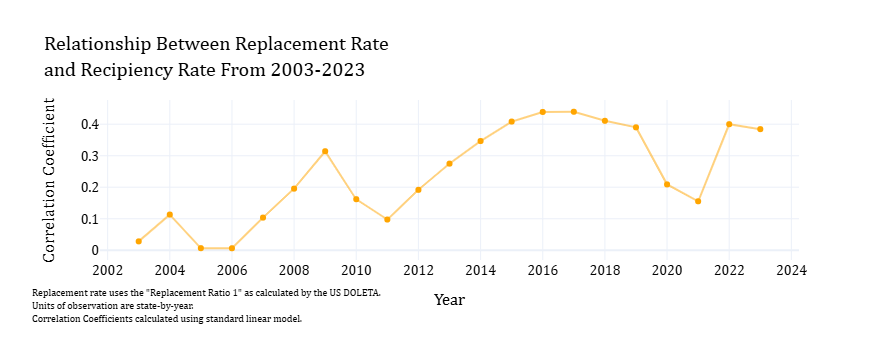

In [93]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = range(2003, 2024), 
             y = corr_coefs
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = range(2003, 2024), 
                y = corr_coefs,
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="Relationship Between Replacement Rate <br>and Recipiency Rate From 2003-2023",
                   xaxis_title="Year", yaxis_title="Correlation Coefficient",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )

fig1.add_annotation(
    text='''Replacement rate uses the "Replacement Ratio 1" as calculated by the US DOLETA. 
            <br>Units of observation are state-by-year.
            <br>Correlation Coefficients calculated using standard linear model.''',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig1.update_layout(margin={"l":100,"b":100})

fig1.show()

In [94]:
write_html(fig1, "fig_5b.html")

In [14]:
del percent_changes

## Figure 6 (scatter): Changes in Recipiency rate vs. changes in real WBA from 2005-2023

In [14]:
master = pd.read_csv('[2004, 2024]base_master_versionDec2025.csv')
rec_realwba = master[['Year', 'State', 'Recipiency Rate',
                   'Real Average WBA (base 2024, region)',
                   'Real Maximum WBA (base 2024, region)']]
rec_realwba = rec_realwba[(rec_realwba["Year"] == 2004) | (rec_realwba["Year"] == 2024)]
rec_realwba

,Year,State,Recipiency Rate,"Real Average WBA (base 2024, region)","Real Maximum WBA (base 2024, region)"
207,2004,AK,0.537228,307.86,427.83
208,2004,AL,0.264752,303.24,352.53
209,2004,AR,0.407655,391.61,579.15
210,2004,AZ,0.271847,327.70,353.65
211,2004,CA,0.395734,460.12,707.29
...,...,...,...,...,...
1293,2024,VT,0.314618,531.28,705.00
1294,2024,WA,0.323126,721.72,1019.00
1295,2024,WI,0.297271,346.58,370.00
1296,2024,WV,0.243330,441.00,662.00


In [15]:
def compute_state_wba_changes(df):
    """
    Computes percent changes in real WBA (average & maximum)
    and absolute change in recipiency rate between 2004 and 2024
    for each state.

    Returns a 52-row DataFrame indexed by State.
    """

    # Filter only the two years of interest
    df_2004 = df[df["Year"] == 2004].set_index("State")
    df_2024 = df[df["Year"] == 2024].set_index("State")

    # Ensure we only keep states present in both years
    states = df_2004.index.intersection(df_2024.index)

    # Compute percent changes
    pct_change_avg = (
        (df_2024.loc[states, "Real Average WBA (base 2024, region)"]
         - df_2004.loc[states, "Real Average WBA (base 2024, region)"])
        / df_2004.loc[states, "Real Average WBA (base 2024, region)"]
    ) * 100

    pct_change_max = (
        (df_2024.loc[states, "Real Maximum WBA (base 2024, region)"]
         - df_2004.loc[states, "Real Maximum WBA (base 2024, region)"])
        / df_2004.loc[states, "Real Maximum WBA (base 2024, region)"]
    ) * 100

    # Compute absolute change in recipiency rate (in pct pts)
    recipiency_change = (
        df_2024.loc[states, "Recipiency Rate"]
        - df_2004.loc[states, "Recipiency Rate"]
    ) * 100

    # Assemble final DataFrame
    result = pd.DataFrame({
        "% Change in Real Average WBA": pct_change_avg,
        "% Change in Real Maximum WBA": pct_change_max,
        "Change in Recipiency Rate": recipiency_change
    })

    return result.reset_index()

In [27]:
reg_dataset = compute_state_wba_changes(rec_realwba)
reg_dataset.head()
#reg_dataset.to_csv("percent_changes2024.csv", index=False)

,State,% Change in Real Average WBA,% Change in Real Maximum WBA,Change in Recipiency Rate
0,AK,-5.798090,-13.517051,-30.996843
1,AL,-16.811766,-21.992455,-13.476209
2,AR,-17.315697,-22.127255,-23.620725
3,AZ,-4.314922,-9.515057,-7.454438
4,CA,-15.713292,-36.376875,-2.143453


In [272]:
def add_range_to_percent_changes(start, end):
    starts = master[master['Year'] == start][['State', 'Recipiency Rate', 
                                              'Real Average WBA (regional, 2000 base)',
                                              'Real Maximum WBA (regional, 2000 base)',
                                              'Real Minimum WBA (regional, 2000 base)']]
    ends = master[master['Year'] == end][['State', 'Recipiency Rate', 
                                              'Real Average WBA (regional, 2000 base)',
                                              'Real Maximum WBA (regional, 2000 base)',
                                              'Real Minimum WBA (regional, 2000 base)']]
    ends = ends.rename(columns={'Recipiency Rate': 'a', 
                                'Real Average WBA (regional, 2000 base)': 'b',
                                'Real Maximum WBA (regional, 2000 base)': 'c',
                                'Real Minimum WBA (regional, 2000 base)': 'd'})
    starts = starts.merge(ends, on="State", how='left')
    
    starts[f'Change in Recipiency Rate ({start}-{end})'] = (starts['a'] - starts['Recipiency Rate'])*100
    starts[f'Change in Real Average WBA ({start}-{end})'] = (starts['b'] - starts['Real Average WBA (regional, 2000 base)'])
    starts[f'Change in Real Maximum WBA ({start}-{end})'] = (starts["c"] - starts['Real Maximum WBA (regional, 2000 base)'])
    starts[f'% Change in Recipiency Rate ({start}-{end})'] = ((starts['a'] - starts['Recipiency Rate'])/starts['Recipiency Rate'])*100
    starts[f'% Change in Real Average WBA ({start}-{end})'] = ((starts['b'] - starts['Real Average WBA (regional, 2000 base)'])/starts['Real Average WBA (regional, 2000 base)'])*100
    starts[f'% Change in Real Maximum WBA ({start}-{end})'] = ((starts["c"] - starts['Real Maximum WBA (regional, 2000 base)'])/starts['Real Maximum WBA (regional, 2000 base)'])*100
    starts[f'% Change in Real Minimum WBA ({start}-{end})'] = ((starts["d"] - starts['Real Minimum WBA (regional, 2000 base)'])/starts['Real Minimum WBA (regional, 2000 base)'])*100
    
    return starts[['State', f'Change in Recipiency Rate ({start}-{end})', f'% Change in Recipiency Rate ({start}-{end})', f'Change in Real Average WBA ({start}-{end})', f'Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Average WBA ({start}-{end})', f'% Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Minimum WBA ({start}-{end})']]
    

In [273]:
del percent_changes
percent_changes = add_range_to_percent_changes(2000, 2023)
for year in range(2001,2019):
    percent_changes = percent_changes.merge(add_range_to_percent_changes(year, 2023), on='State', how='left')

In [314]:
def add_range_to_percent_changes_state(start, end):
    starts = master[master['Year'] == start][['State', 'Recipiency Rate', 
                                              'Real Average WBA (state, 2000 base)',
                                              'Real Maximum WBA (state, 2000 base)',
                                              'Real Minimum WBA (state, 2000 base)']]
    ends = master[master['Year'] == end][['State', 'Recipiency Rate', 
                                              'Real Average WBA (state, 2000 base)',
                                              'Real Maximum WBA (state, 2000 base)',
                                              'Real Minimum WBA (state, 2000 base)']]
    ends = ends.rename(columns={'Recipiency Rate': 'a', 
                                'Real Average WBA (state, 2000 base)': 'b',
                                'Real Maximum WBA (state, 2000 base)': 'c',
                                'Real Minimum WBA (state, 2000 base)': 'd'})
    starts = starts.merge(ends, on="State", how='left')
    
    starts[f'Change in Recipiency Rate ({start}-{end})'] = (starts['a'] - starts['Recipiency Rate'])*100
    starts[f'Change in Real Average WBA ({start}-{end})'] = (starts['b'] - starts['Real Average WBA (state, 2000 base)'])
    starts[f'Change in Real Maximum WBA ({start}-{end})'] = (starts["c"] - starts['Real Maximum WBA (state, 2000 base)'])
    starts[f'% Change in Recipiency Rate ({start}-{end})'] = ((starts['a'] - starts['Recipiency Rate'])/starts['Recipiency Rate'])*100
    starts[f'% Change in Real Average WBA ({start}-{end})'] = ((starts['b'] - starts['Real Average WBA (state, 2000 base)'])/starts['Real Average WBA (state, 2000 base)'])*100
    starts[f'% Change in Real Maximum WBA ({start}-{end})'] = ((starts["c"] - starts['Real Maximum WBA (state, 2000 base)'])/starts['Real Maximum WBA (state, 2000 base)'])*100
    starts[f'% Change in Real Minimum WBA ({start}-{end})'] = ((starts["d"] - starts['Real Minimum WBA (state, 2000 base)'])/starts['Real Minimum WBA (state, 2000 base)'])*100
    
    return starts[['State', f'Change in Recipiency Rate ({start}-{end})', f'% Change in Recipiency Rate ({start}-{end})', f'Change in Real Average WBA ({start}-{end})', f'Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Average WBA ({start}-{end})', f'% Change in Real Maximum WBA ({start}-{end})', f'% Change in Real Minimum WBA ({start}-{end})']]
    

In [316]:

percent_changes_state = add_range_to_percent_changes_state(2000, 2017)
for year in range(2001,2015):
    percent_changes_state = percent_changes_state.merge(add_range_to_percent_changes_state(year, 2017), on='State', how='left')

In [319]:
percent_changes_state = percent_changes_state.dropna()
percent_changes_state.to_csv("percent_changes_state.csv")

In [28]:
reg_dataset = reg_dataset.merge(master[master['Year'] == 2024][['State', 'Indexer', 'Non-indexer']], on="State", how="inner")
reg_dataset.head()

,State,% Change in Real Average WBA,% Change in Real Maximum WBA,Change in Recipiency Rate,Indexer,Non-indexer
0,AK,-5.798090,-13.517051,-30.996843,False,True
1,AL,-16.811766,-21.992455,-13.476209,False,True
2,AR,-17.315697,-22.127255,-23.620725,True,False
3,AZ,-4.314922,-9.515057,-7.454438,False,True
4,CA,-15.713292,-36.376875,-2.143453,False,True


In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# -------------------------
# Average WBA regression
# -------------------------
X_avg = reg_dataset[['% Change in Real Average WBA']]
y = reg_dataset['Change in Recipiency Rate']

# Add constant for intercept
X_avg_const = sm.add_constant(X_avg)

model_avg = sm.OLS(y, X_avg_const).fit()

slope_avg = model_avg.params['% Change in Real Average WBA']
r_squared_avg = model_avg.rsquared
p_avg = model_avg.pvalues['% Change in Real Average WBA']

# -------------------------
# Maximum WBA regression
# -------------------------
X_max = reg_dataset[['% Change in Real Maximum WBA']]
y = reg_dataset['Change in Recipiency Rate']

# Add constant for intercept
X_max_const = sm.add_constant(X_max)

model_max = sm.OLS(y, X_max_const).fit()

slope_max = model_max.params['% Change in Real Maximum WBA']
r_squared_max = model_max.rsquared
p_max = model_max.pvalues['% Change in Real Maximum WBA']

print(slope_avg, r_squared_avg, p_avg)
print(slope_max, r_squared_max, p_max)

0.1562853261793992 0.1282193198997793 0.009149590263223506
0.10077799642962477 0.06540282462396751 0.0672652593544358


In [57]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = reg_dataset[['% Change in Real Average WBA']]
y = reg_dataset['Change in Recipiency Rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                               
Dep. Variable:     Change in Recipiency Rate   R-squared:                       0.128
Model:                                   OLS   Adj. R-squared:                  0.111
Method:                        Least Squares   F-statistic:                     7.354
Date:                       Wed, 04 Feb 2026   Prob (F-statistic):            0.00915
Time:                               14:56:41   Log-Likelihood:                -184.44
No. Observations:                         52   AIC:                             372.9
Df Residuals:                             50   BIC:                             376.8
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [31]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X = reg_dataset[['% Change in Real Maximum WBA']]
y = reg_dataset['Change in Recipiency Rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                               
Dep. Variable:     Change in Recipiency Rate   R-squared:                       0.065
Model:                                   OLS   Adj. R-squared:                  0.047
Method:                        Least Squares   F-statistic:                     3.499
Date:                       Wed, 04 Feb 2026   Prob (F-statistic):             0.0673
Time:                               14:36:27   Log-Likelihood:                -186.25
No. Observations:                         52   AIC:                             376.5
Df Residuals:                             50   BIC:                             380.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

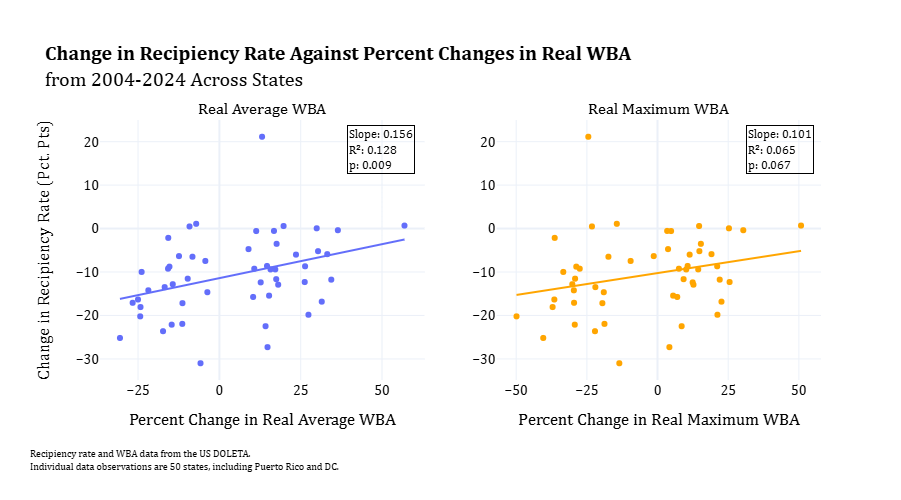

In [32]:
fig1 = px.scatter(data_frame = reg_dataset,
                 x = '% Change in Real Average WBA',
                 y = 'Change in Recipiency Rate',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
fig2 = px.scatter(data_frame = reg_dataset,
                 x = '% Change in Real Maximum WBA',
                 y = 'Change in Recipiency Rate',
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'],
                 trendline='ols')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Change in Recipiency Rate Against Percent Changes in Real WBA</b> <br>from 2004-2024 Across States",
                   yaxis_title="Change in Recipiency Rate (Pct. Pts)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-50, -25, 0, 25, 50]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}<br>p: {p_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}<br>p: {p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

#### Labor Force Weighting

In [34]:
laborforce = pd.read_csv("laborforce2024.csv")
laborforce = laborforce[laborforce["Year"] >= 2004]
laborforce['Civilian Labor Force'] = laborforce['Civilian Labor Force(000)'].str.replace(',', '', regex=False).astype(int)
laborforce = laborforce.groupby("State")[["Civilian Labor Force"]].mean().reset_index()
laborforce.head()

,State,Civilian Labor Force
0,AK,355.916667
1,AL,2206.880952
2,AR,1348.202381
3,AZ,3224.785714
4,CA,18628.940476


In [35]:
reg_dataset = reg_dataset.merge(laborforce, on="State", how="left")
reg_dataset.head()

,State,% Change in Real Average WBA,% Change in Real Maximum WBA,Change in Recipiency Rate,Indexer,Non-indexer,Civilian Labor Force
0,AK,-5.798090,-13.517051,-30.996843,False,True,355.916667
1,AL,-16.811766,-21.992455,-13.476209,False,True,2206.880952
2,AR,-17.315697,-22.127255,-23.620725,True,False,1348.202381
3,AZ,-4.314922,-9.515057,-7.454438,False,True,3224.785714
4,CA,-15.713292,-36.376875,-2.143453,False,True,18628.940476


In [36]:
reg_dataset['% Change in Real Average WBA'].mean(), reg_dataset['% Change in Real Maximum WBA'].mean(), reg_dataset['Change in Recipiency Rate'].mean()

(4.522505834919505, -4.5097418081532545, -10.701007484676554)

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# -------------------------
# Average WBA regression
# -------------------------
X_avg = reg_dataset[['% Change in Real Average WBA']]
y = reg_dataset['Change in Recipiency Rate']
w = reg_dataset['Civilian Labor Force']


# Add constant for intercept
X_avg_const = sm.add_constant(X_avg)

model_avg = sm.WLS(y, X_avg_const, weights=w).fit()

w_slope_avg = model_avg.params['% Change in Real Average WBA']
w_r_squared_avg = model_avg.rsquared
w_p_avg = model_avg.pvalues['% Change in Real Average WBA']

# -------------------------
# Maximum WBA regression
# -------------------------
X_max = reg_dataset[['% Change in Real Maximum WBA']]
y = reg_dataset['Change in Recipiency Rate']

# Add constant for intercept
X_max_const = sm.add_constant(X_max)

model_max = sm.WLS(y, X_max_const, weights=w).fit()

w_slope_max = model_max.params['% Change in Real Maximum WBA']
w_r_squared_max = model_max.rsquared
w_p_max = model_max.pvalues['% Change in Real Maximum WBA']

print(w_slope_avg, w_r_squared_avg, w_p_avg)
print(w_slope_max, w_r_squared_max, w_p_max)

0.1736129486524859 0.13375397087157104 0.007670885631597046
0.08291033222098274 0.042094790936267557 0.14453454812182293


In [58]:
import statsmodels.api as sm

X = reg_dataset[['% Change in Real Average WBA']]
y = reg_dataset['Change in Recipiency Rate']
w = reg_dataset['Civilian Labor Force']

X2 = sm.add_constant(X)

est = sm.WLS(y, X2, weights=w)
est2 = est.fit()

print(est2.summary())

                                WLS Regression Results                               
Dep. Variable:     Change in Recipiency Rate   R-squared:                       0.134
Model:                                   WLS   Adj. R-squared:                  0.116
Method:                        Least Squares   F-statistic:                     7.720
Date:                       Wed, 04 Feb 2026   Prob (F-statistic):            0.00767
Time:                               15:02:08   Log-Likelihood:                -196.32
No. Observations:                         52   AIC:                             396.6
Df Residuals:                             50   BIC:                             400.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [59]:
import statsmodels.api as sm

X = reg_dataset[['% Change in Real Maximum WBA']]
y = reg_dataset['Change in Recipiency Rate']
w = reg_dataset['Civilian Labor Force']

X2 = sm.add_constant(X)

est = sm.WLS(y, X2, weights=w)
est2 = est.fit()

print(est2.summary())

                                WLS Regression Results                               
Dep. Variable:     Change in Recipiency Rate   R-squared:                       0.042
Model:                                   WLS   Adj. R-squared:                  0.023
Method:                        Least Squares   F-statistic:                     2.197
Date:                       Wed, 04 Feb 2026   Prob (F-statistic):              0.145
Time:                               15:02:28   Log-Likelihood:                -198.93
No. Observations:                         52   AIC:                             401.9
Df Residuals:                             50   BIC:                             405.8
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

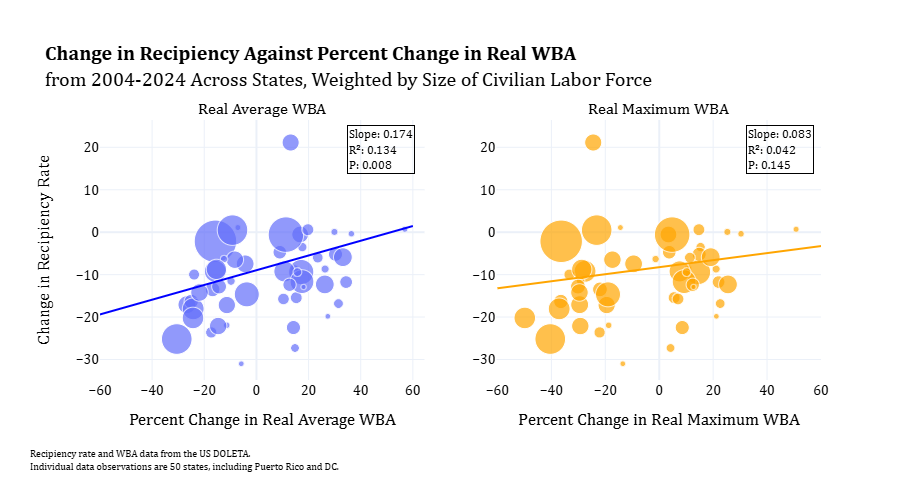

In [38]:
X = sm.add_constant(reg_dataset[['% Change in Real Maximum WBA']])
y = reg_dataset['Change in Recipiency Rate']
w = reg_dataset['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

X = sm.add_constant(reg_dataset[['% Change in Real Average WBA']])
y = reg_dataset['Change in Recipiency Rate']
w = reg_dataset['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

fig1 = px.scatter(data_frame = reg_dataset,
                 x = '% Change in Real Average WBA',
                 y = 'Change in Recipiency Rate',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = reg_dataset,
                 x = '% Change in Real Maximum WBA',
                 y = 'Change in Recipiency Rate',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Change in Recipiency Against Percent Change in Real WBA</b> <br>from 2004-2024 Across States, Weighted by Size of Civilian Labor Force",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}<br>P: {p_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}<br>P: {p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

### Plotting just Avg Wba and Weighted Avg Wba

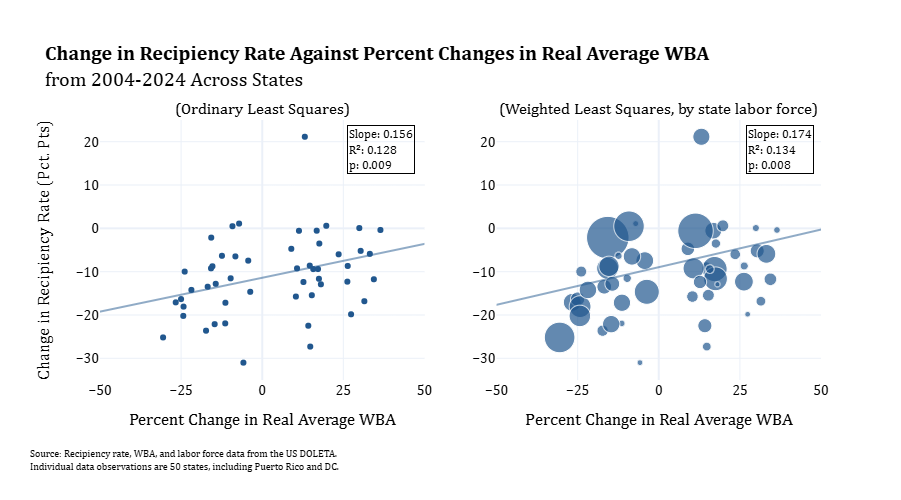

In [53]:
X = sm.add_constant(reg_dataset[['% Change in Real Average WBA']])
y = reg_dataset['Change in Recipiency Rate']

model = sm.OLS(y, X).fit()

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

X = sm.add_constant(reg_dataset[['% Change in Real Average WBA']])
y = reg_dataset['Change in Recipiency Rate']
w = reg_dataset['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']


fig1 = px.scatter(data_frame = reg_dataset,
                 x = '% Change in Real Average WBA',
                 y = 'Change in Recipiency Rate',
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['#21578e'])
fig1.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='#21578e', width=2),
    opacity=0.5,
    showlegend=False
))
fig2 = px.scatter(data_frame = reg_dataset,
                 x = '% Change in Real Average WBA',
                 y = 'Change in Recipiency Rate',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['#21578e'])
fig2.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='#21578e', width=2),
    opacity=0.5,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("(Ordinary Least Squares)", "(Weighted Least Squares, by state labor force)"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Change in Recipiency Rate Against Percent Changes in Real Average WBA</b> <br>from 2004-2024 Across States",
                   yaxis_title="Change in Recipiency Rate (Pct. Pts)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals = [-50, -25, 0, 25, 50]
x_range = [-50, 50]
y_range = [-35, 25]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", range=x_range, tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Average WBA", range=x_range, tickvals=tickvals, row=1, col=2)

fig.update_yaxes(range=y_range, row=1, col=1)
fig.update_yaxes(range=y_range, row=1, col=2)

fig.add_annotation(
    text='Source: Recipiency rate, WBA, and labor force data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {w_slope_avg:.3f}<br>R²: {w_r_squared_avg:.3f}<br>p: {w_p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}<br>p: {p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

## Splitting into Indexer and Nonindexer

In [70]:
INDEXER_COLOR = "#99C642"
NONINDEXER_COLOR = "#800020"

In [71]:
df_indexer = reg_dataset[reg_dataset['Indexer']]
df_nonindexer = reg_dataset[reg_dataset['Non-indexer']]

In [72]:
# -------------------------
# Average WBA regression
# -------------------------
X_avg = df_indexer[['% Change in Real Average WBA']]
y = df_indexer['Change in Recipiency Rate']

# Add constant for intercept
X_avg_const = sm.add_constant(X_avg)

model_avg = sm.OLS(y, X_avg_const).fit()

i_slope_avg = model_avg.params['% Change in Real Average WBA']
i_r_squared_avg = model_avg.rsquared
i_p_avg = model_avg.pvalues['% Change in Real Average WBA']

# ---------------------

X_avg = df_indexer[['% Change in Real Average WBA']]
y = df_indexer['Change in Recipiency Rate']
w = df_indexer['Civilian Labor Force']

# Add constant for intercept
X_avg_const = sm.add_constant(X_avg)

model_avg = sm.WLS(y, X_avg_const, weights=w).fit()

i_w_slope_avg = model_avg.params['% Change in Real Average WBA']
i_w_r_squared_avg = model_avg.rsquared
i_w_p_avg = model_avg.pvalues['% Change in Real Average WBA']

# ---------------------

X_avg = df_nonindexer[['% Change in Real Average WBA']]
y = df_nonindexer['Change in Recipiency Rate']

# Add constant for intercept
X_avg_const = sm.add_constant(X_avg)

model_avg = sm.OLS(y, X_avg_const).fit()

n_slope_avg = model_avg.params['% Change in Real Average WBA']
n_r_squared_avg = model_avg.rsquared
n_p_avg = model_avg.pvalues['% Change in Real Average WBA']

# ---------------------

X_avg = df_nonindexer[['% Change in Real Average WBA']]
y = df_nonindexer['Change in Recipiency Rate']
w = df_nonindexer['Civilian Labor Force']

# Add constant for intercept
X_avg_const = sm.add_constant(X_avg)

model_avg = sm.WLS(y, X_avg_const, weights=w).fit()

n_w_slope_avg = model_avg.params['% Change in Real Average WBA']
n_w_r_squared_avg = model_avg.rsquared
n_w_p_avg = model_avg.pvalues['% Change in Real Average WBA']

print(i_slope_avg, i_r_squared_avg, i_p_avg)
print(n_slope_avg, n_r_squared_avg, n_p_avg)
print(i_w_slope_avg, i_w_r_squared_avg, i_w_p_avg)
print(n_w_slope_avg, n_w_r_squared_avg, n_w_p_avg)

0.16887939897481413 0.11103324167653239 0.05810133061292723
0.23753147923383053 0.0471270267148125 0.4026223790169946
0.21295745460211257 0.16491249347327452 0.019029939383308096
0.8369306832207062 0.48512080530548807 0.0018941863813229248


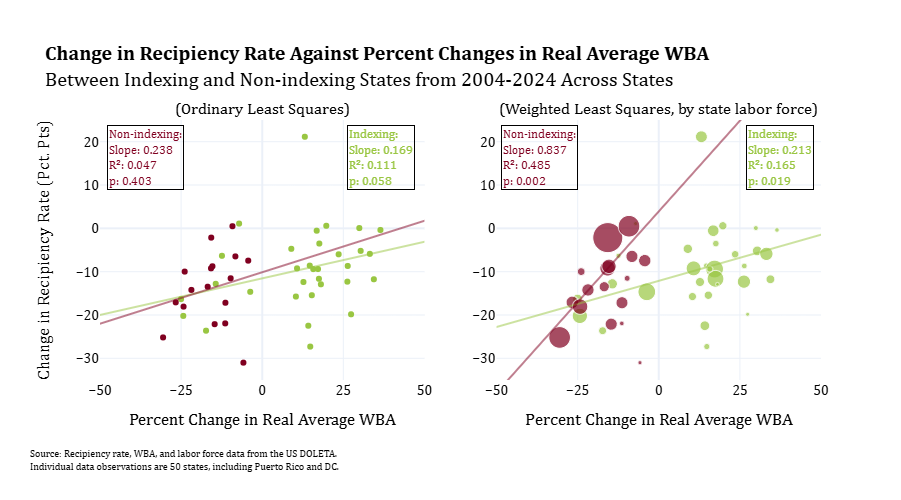

In [84]:
fig1 = go.Figure()

fig1.add_trace(go.Scatter(
    x=df_indexer['% Change in Real Average WBA'],
    y=df_indexer['Change in Recipiency Rate'],
    mode='markers',
    marker=dict(color=INDEXER_COLOR),
    hovertext=df_indexer['State'],
    showlegend=False
))

fig1.add_trace(go.Scatter(
    x=df_nonindexer['% Change in Real Average WBA'],
    y=df_nonindexer['Change in Recipiency Rate'],
    mode='markers',
    marker=dict(color=NONINDEXER_COLOR),
    hovertext=df_nonindexer['State'],
    showlegend=False
))

fig1.add_trace(go.Scatter(
    x=x_i_ols,
    y=y_i_ols,
    mode='lines',
    line=dict(color=INDEXER_COLOR, width=2),
    opacity=0.5,
    showlegend=False
))

fig1.add_trace(go.Scatter(
    x=x_n_ols,
    y=y_n_ols,
    mode='lines',
    line=dict(color=NONINDEXER_COLOR, width=2),
    opacity=0.5,
    showlegend=False
))
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=df_indexer['% Change in Real Average WBA'],
    y=df_indexer['Change in Recipiency Rate'],
    mode='markers',
    marker=dict(
        color=INDEXER_COLOR,
        size=df_indexer['Civilian Labor Force'],
        sizemode='area',
        sizeref=2.*reg_dataset['Civilian Labor Force'].max()/(30.**2),
    ),
    hovertext=df_indexer['State'],
    showlegend=False
))

fig2.add_trace(go.Scatter(
    x=df_nonindexer['% Change in Real Average WBA'],
    y=df_nonindexer['Change in Recipiency Rate'],
    mode='markers',
    marker=dict(
        color=NONINDEXER_COLOR,
        size=df_nonindexer['Civilian Labor Force'],
        sizemode='area',
        sizeref=2.*reg_dataset['Civilian Labor Force'].max()/(30.**2),
    ),
    hovertext=df_nonindexer['State'],
    showlegend=False
))

fig2.add_trace(go.Scatter(
    x=x_i_wls,
    y=y_i_wls,
    mode='lines',
    line=dict(color=INDEXER_COLOR, width=2),
    opacity=0.5,
    showlegend=False
))

fig2.add_trace(go.Scatter(
    x=x_n_wls,
    y=y_n_wls,
    mode='lines',
    line=dict(color=NONINDEXER_COLOR, width=2),
    opacity=0.5,
    showlegend=False
))
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=[
        "(Ordinary Least Squares)",
        "(Weighted Least Squares, by state labor force)"
    ]
)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)


fig.update_layout(title_text="<b>Change in Recipiency Rate Against Percent Changes in Real Average WBA</b> <br>Between Indexing and Non-indexing States from 2004-2024 Across States",
                   yaxis_title="Change in Recipiency Rate (Pct. Pts)",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals = [-50, -25, 0, 25, 50]
x_range = [-50, 50]
y_range = [-35, 25]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", range=x_range, tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Average WBA", range=x_range, tickvals=tickvals, row=1, col=2)

fig.update_yaxes(range=y_range, row=1, col=1)
fig.update_yaxes(range=y_range, row=1, col=2)

fig.add_annotation(
    text='Source: Recipiency rate, WBA, and labor force data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
# OLS, nonindexer
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.01, y=0.98,
    text=f"Non-indexing:<br>Slope: {n_slope_avg:.3f}<br>R²: {n_r_squared_avg:.3f}<br>p: {n_p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color=NONINDEXER_COLOR),
    align="left",
    bordercolor="black",
    borderwidth=1
)
# OLS, indexer
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Indexing:<br>Slope: {i_slope_avg:.3f}<br>R²: {i_r_squared_avg:.3f}<br>p: {i_p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color=INDEXER_COLOR),
    align="left",
    bordercolor="black",
    borderwidth=1
)
# WLS, nonindexer
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.61, y=0.98,
    text=f"Non-indexing:<br>Slope: {n_w_slope_avg:.3f}<br>R²: {n_w_r_squared_avg:.3f}<br>p: {n_w_p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color=NONINDEXER_COLOR),
    align="left",
    bordercolor="black",
    borderwidth=1
)
# WLS, indexer
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Indexing:<br>Slope: {i_w_slope_avg:.3f}<br>R²: {i_w_r_squared_avg:.3f}<br>p: {i_w_p_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color=INDEXER_COLOR),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

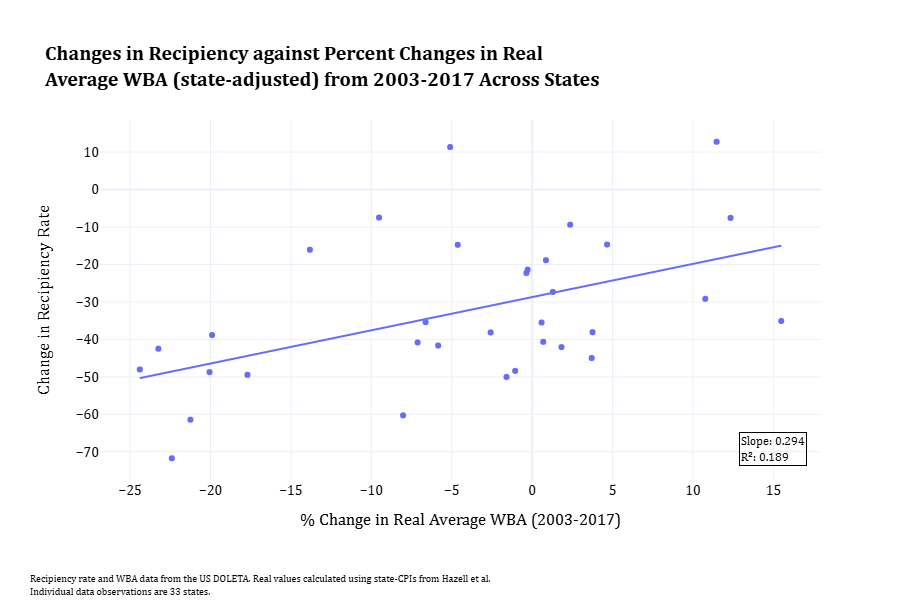

In [366]:
fig1 = px.scatter(data_frame = percent_changes_state,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
    
fig1.update_layout(title_text="<b>Changes in Recipiency against Percent Changes in Real <br>Average WBA (state-adjusted) from 2003-2017 Across States",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig1.update_layout(height=600, width=600)
tickvals=[-50, -25, 0, 25, 50]
fig1.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig1.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=0.04,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig1.update_layout(margin={"l":100,"b":120, "t":120})
fig1.show()

In [297]:
add_range_to_percent_changes(2003,2023).sort_values('% Change in Real Average WBA (2003-2023)', ascending=False)

,State,Change in Recipiency Rate (2003-2023),% Change in Recipiency Rate (2003-2023),Change in Real Average WBA (2003-2023),Change in Real Maximum WBA (2003-2023),% Change in Real Average WBA (2003-2023),% Change in Real Maximum WBA (2003-2023),% Change in Real Minimum WBA (2003-2023)
28,ND,-6.653704,-17.887148,99.00,126.83,45.065550,46.332286,-36.954915
42,SD,-6.657962,-28.065898,59.72,62.38,29.766236,27.422191,-36.927734
26,MT,-8.924672,-20.027769,56.15,79.37,27.380894,28.833509,61.405672
48,WA,-14.171333,-31.291816,80.16,79.53,26.404902,17.300037,72.542099
29,NE,-19.925569,-52.900073,47.70,58.63,23.328606,23.707088,22.601530
12,IA,-21.795223,-49.270907,53.80,52.34,22.665993,18.989914,20.251293
19,MA,-3.788293,-6.876171,68.39,110.24,21.367869,23.452325,23.317218
21,ME,-6.939450,-18.721570,45.33,45.21,20.958942,17.230734,18.291878
37,OR,-8.636084,-18.629716,48.52,47.28,19.709156,12.595572,14.593968
47,VT,-14.790155,-26.712017,44.79,56.49,18.757067,17.359105,4818.279570


In [275]:
percent_changes.to_csv("percent_changes.csv")

In [216]:
del percent_changes_sliding
percent_changes_sliding = add_range_to_percent_changes(2002, 2012)
for year in range(2003,2014):
    percent_changes_sliding = percent_changes_sliding.merge(add_range_to_percent_changes(year, year+10), on='State', how='left')
percent_changes_sliding = percent_changes_sliding.dropna()
#drop puerto rico

In [217]:
percent_changes_sliding.to_csv("percent_changes_sliding.csv")

In [218]:
len(percent_changes_sliding)

51

In [220]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

def get_slope_r_squared_sliding(data):
    year_start = []
    year_end = []
    r_squared_avgs = []
    slope_avgs = []
    r_squared_maxs = []
    slope_maxs = []
    
    for year in range(2002, 2014):
        start = year
        end = year+10
        year_start.append(start)
        year_end.append(end)
        
        # Prepare variables
        X = data[[f'% Change in Real Average WBA ({start}-{end})']]
        y = data[f'Change in Recipiency Rate ({start}-{end})']

        # Fit OLS model
        model = LinearRegression()
        model.fit(X, y)

        # Get slope and R^2
        slope_avg = model.coef_[0]
        slope_avgs.append(slope_avg)
        r_squared_avg = model.score(X, y)
        r_squared_avgs.append(r_squared_avg)

        # Prepare variables
        X = data[[f'% Change in Real Maximum WBA ({start}-{end})']]
        y = data[f'Change in Recipiency Rate ({start}-{end})']

        # Fit OLS model
        model = LinearRegression()
        model.fit(X, y)

        # Get slope and R^2
        slope_max = model.coef_[0]
        slope_maxs.append(slope_max)
        r_squared_max = model.score(X, y)
        r_squared_maxs.append(r_squared_max)
        
    df = pd.DataFrame()
    df['Year Start'] = year_start
    df['Year End'] = year_end
    df['r_squared_avgs'] = r_squared_avgs
    df['slope_avgs'] = slope_avgs
    df['r_squared_maxs'] = r_squared_maxs
    df['slope_maxs'] = slope_maxs

    return df

In [233]:
sliding_lm = get_slope_r_squared_sliding(percent_changes_sliding)
sliding_lm

,Year Start,Year End,r_squared_avgs,slope_avgs,r_squared_maxs,slope_maxs
0,2002,2012,0.059629,0.157886,0.025171,0.084666
1,2003,2013,0.267180,0.263652,0.085142,0.125549
2,2004,2014,0.317014,0.241067,0.096456,0.112600
3,2005,2015,0.432673,0.290933,0.270820,0.230430
4,2006,2016,0.380279,0.300898,0.286013,0.246494
5,2007,2017,0.261057,0.311021,0.186426,0.216588
6,2008,2018,0.204212,0.308344,0.122655,0.204059
7,2009,2019,0.045415,0.186438,0.117942,0.263570
8,2010,2020,0.045837,0.356509,0.052059,0.368062
9,2011,2021,0.000082,0.007120,0.024022,0.105942


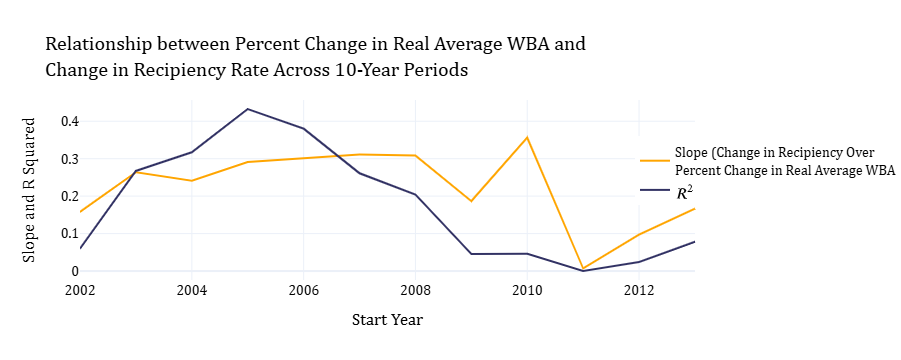

In [249]:
pio.templates.default = 'plotly_white'

fig1 = px.line(data_frame = sliding_lm, 
             x = "Year Start", 
             y = "slope_avgs",
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Slope (Change in Recipiency Over <br>Percent Change in Real Average WBA", showlegend=True)

fig3 = px.line(data_frame = sliding_lm, 
             x = "Year Start", 
             y = "r_squared_avgs")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="$$R^2$$", showlegend=True)

fig1 = go.Figure(data=fig1.data + fig3.data)
fig1.update_layout(title_text="Relationship between Percent Change in Real Average WBA and <br>Change in Recipiency Rate Across 10-Year Periods</b>",
                   xaxis_title="Start Year", yaxis_title="Slope and R Squared",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )

fig1.show()

In [307]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare variables
X = percent_changes[['% Change in Real Average WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_avg = model.coef_[0]
r_squared_avg = model.score(X, y)

# Prepare variables
X = percent_changes[['% Change in Real Maximum WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

# Fit OLS model
model = LinearRegression()
model.fit(X, y)

# Get slope and R^2
slope_max = model.coef_[0]
r_squared_max = model.score(X, y)

print(slope_avg, r_squared_avg, slope_max, r_squared_max)

0.48137548834602223 0.17230880279714744 0.33800278534325606 0.11843167605548


In [308]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = percent_changes[['% Change in Real Average WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.172
Model:                                                 OLS   Adj. R-squared:                  0.156
Method:                                      Least Squares   F-statistic:                     10.41
Date:                                     Thu, 01 May 2025   Prob (F-statistic):            0.00221
Time:                                             00:10:01   Log-Likelihood:                -228.88
No. Observations:                                       52   AIC:                             461.8
Df Residuals:                                           50   BIC:                             465.7
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [309]:
X = percent_changes[['% Change in Real Maximum WBA (2003-2023)']]
y = percent_changes['% Change in Recipiency Rate (2003-2023)']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.118
Model:                                                 OLS   Adj. R-squared:                  0.101
Method:                                      Least Squares   F-statistic:                     6.717
Date:                                     Thu, 01 May 2025   Prob (F-statistic):             0.0125
Time:                                             00:10:06   Log-Likelihood:                -230.52
No. Observations:                                       52   AIC:                             465.0
Df Residuals:                                           50   BIC:                             469.0
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


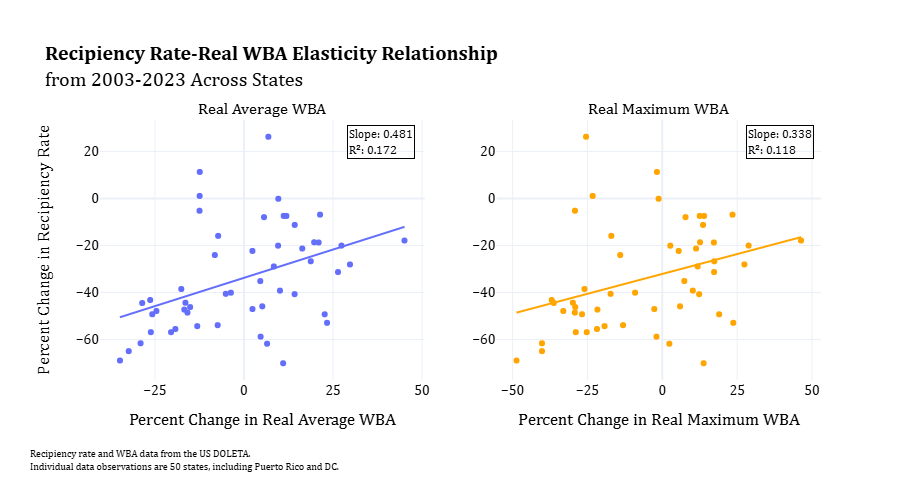

In [310]:
fig1 = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 hover_data = ['State'],
                 height=500,
                 trendline='ols')
fig2 = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'],
                 trendline='ols')

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Elasticity Relationship</b> <br>from 2003-2023 Across States",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-50, -25, 0, 25, 50]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [117]:
write_html(fig, "fig_6.html")

In [ ]:
fig = px.scatter(data_frame = percent_changes,
                 x = '% Change in Real Average WBA',
                 y = 'Change in Recipiency Rate',
                 width = 500,
                 height = 300,
                 hover_data = ['State'],
                 trendline='ols')

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [332]:
from scipy.stats import pearsonr

def get_corr_coef_for_year(df, year, x, y, plotly=False):
    df = df[df['Year'] == year]
    r, _ = pearsonr(df[x], df[y])
    if plotly:
        fig = px.scatter(data_frame = df,
                 x = x,
                 y = y,
                 width = 500,
                 height = 300,
                 hover_data = ['State'],
                 trendline='ols')

        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.show()
    return r

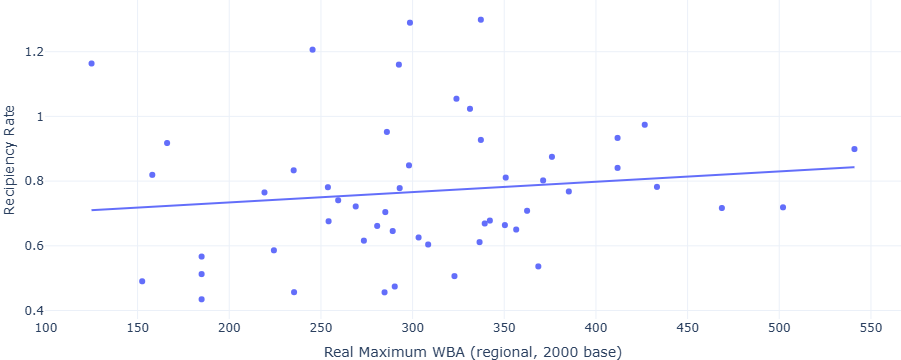

0.13117708759855096

In [340]:
get_corr_coef_for_year(rec_repl, year = 2020, 
                           x = 'Real Maximum WBA (regional, 2000 base)', 
                           y = 'Recipiency Rate', 
                           plotly=True)

In [338]:
corr_coefs = []
for year in range(2000, 2024):
    corr_coefs.append(get_corr_coef_for_year(rec_repl, year = year, 
                           x = 'Real Maximum WBA (regional, 2000 base)', 
                           y = 'Recipiency Rate', 
                           plotly=False))
corr_coefs

[0.4720192040159296,
 0.5414399378043866,
 0.5425022897849476,
 0.5016991735470946,
 0.46967558367951656,
 0.40824622556945833,
 0.43967394753759087,
 0.45944523098400797,
 0.4904731922257971,
 0.5108934412949887,
 0.3988448030616376,
 0.41486186945232395,
 0.47421429023259387,
 0.5187710859072939,
 0.5868903465816666,
 0.6671616789236068,
 0.7088602478148412,
 0.674672788710328,
 0.6459464011505007,
 0.6805550818272315,
 0.13117708759855096,
 0.33164038398265366,
 0.5751197211338104,
 0.6342120252355656]

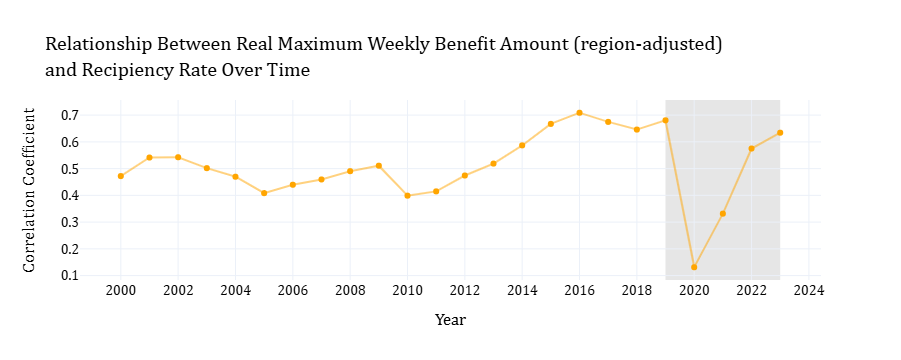

In [347]:
pio.templates.default = 'plotly_white'

fig1 = px.line(
             x = range(2000, 2024), 
             y = corr_coefs
              )
fig1.update_traces(line=dict(color = 'rgba(255, 165, 0,0.5)'))

fig2 = px.scatter(
                x = range(2000, 2024), 
                y = corr_coefs,
                color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig1 = go.Figure(data=fig1.data + fig2.data )
fig1.update_layout(title_text="Relationship Between Real Maximum Weekly Benefit Amount (region-adjusted) <br>and Recipiency Rate Over Time",
                   xaxis_title="Year", yaxis_title="Correlation Coefficient",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=0.1 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.8
                    )
                  )
fig1.add_shape(
    type="rect",
    x0=2019, x1=2023,  
    y0=0, y1=1,         
    xref="x",
    yref="paper",     
    fillcolor="gray",
    opacity=0.2,
    layer="below",    
    line_width=0
)
fig1.show()

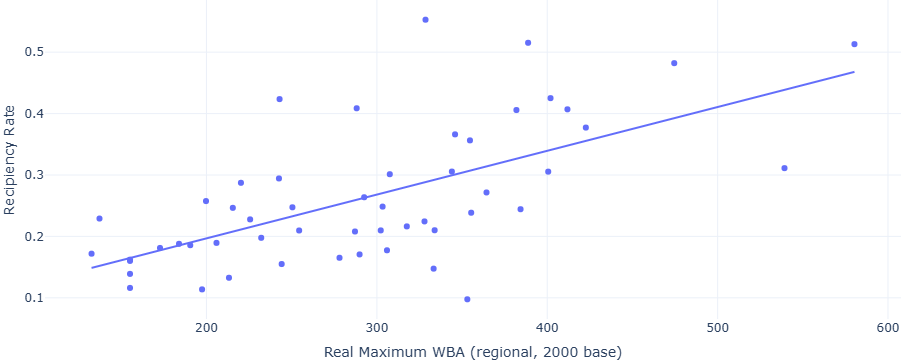

0.6342120252355656

In [349]:
get_corr_coef_for_year(master, year = 2023, 
                           x = 'Real Maximum WBA (regional, 2000 base)', 
                           y = 'Recipiency Rate', 
                           plotly=True)

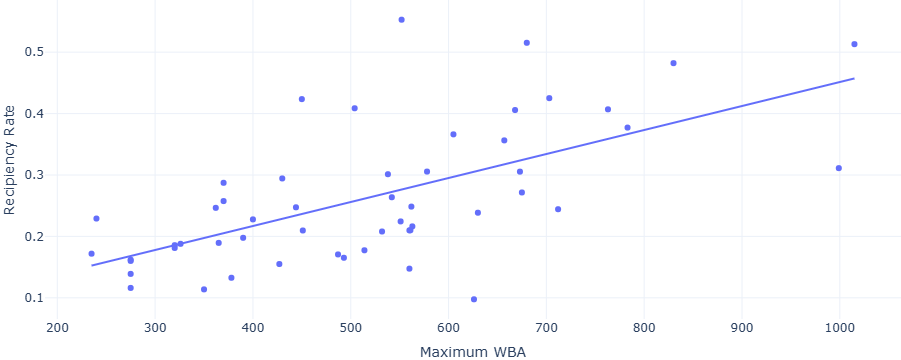

0.6259509370881278

In [350]:
get_corr_coef_for_year(master, year = 2023, 
                           x = 'Maximum WBA', 
                           y = 'Recipiency Rate', 
                           plotly=True)

In [ ]:
# changes in nominal wba against changes in recipiency rate 

## Calc: Those that saw declines in real values

In [86]:
percent_changes = pd.read_csv("percent_changes2024.csv")

In [88]:
avg_neg = (percent_changes['% Change in Real Average WBA'] < 0).sum()
max_neg = (percent_changes['% Change in Real Maximum WBA'] < 0).sum()

avg_neg, max_neg

(24, 25)

In [90]:
avg_avg = (percent_changes['% Change in Real Average WBA']).mean()
max_avg = (percent_changes['% Change in Real Maximum WBA']).mean()
avg_avg, max_avg

(4.522505834919504, -4.5097418081532545)